# importing Library

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

In [3]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
# Shape of the dataset
print(f"Train df shape: {train_df.shape}")
print("\n<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Basic information about the dataset
print("Train df info")
train_df.info()
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Check for missing values
print("Check the missing values.")
print(train_df.isnull().sum())
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Percentage of missing values
print("Percentage of missing values:")
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
print(missing_percentage)
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Check for duplicated values
print("Check the Duplicated values.")
duplicates = train_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Shape of the dataset
print(f"Train df shape: {train_df.shape}")
print("\n<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Basic information about the dataset
print("Train df info")
train_df.info()
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Check for missing values
print("Check the missing values.")
print(train_df.isnull().sum())
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Percentage of missing values
print("Percentage of missing values:")
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
print(missing_percentage)
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")


# Check for duplicated values
print("Check the Duplicated values.")
duplicates = train_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

Train df shape: (1200000, 21)

<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>

Train df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credi

In [5]:
# Shape of the dataset
print(f"Test df shape: {test_df.shape}")
print("\n<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Basic information about the dataset
print("Test df info")
test_df.info()
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Check for missing values
print("Check the missing values.")
print(test_df.isnull().sum())
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Percentage of missing values
print("Percentage of missing values:")
missing_percentage = (test_df.isnull().sum() / len(test_df)) * 100
print(missing_percentage)
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Check for duplicated values
print("Check the Duplicated values.")
duplicates = test_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Summary statistics of numerical columns
print("Test df Describe.")
print(test_df.describe())
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")

# Checking unique values in each column
print("Unique values in each column:")
for col in test_df.columns:
    unique_vals = test_df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")


# Data type distribution
print("Data type distribution:")
print(test_df.dtypes.value_counts())
print("<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>\n")


Test df shape: (800000, 20)

<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>

Test df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708

# Fill the numerical columns¶

In [6]:
# Select only numerical columns
numerical_train = train_df.select_dtypes(include=["float64", "int64"])

# Fill missing values in numerical columns with their median
train_df[numerical_train.columns] = numerical_train.fillna(numerical_train.median())

In [7]:
# Select only numerical columns
numerical_test = test_df.select_dtypes(include=["float64", "int64"])

# Fill missing values in numerical columns with their median
test_df[numerical_test.columns] = numerical_test.fillna(numerical_test.median())

# fill the categorical columns 

In [8]:
# Select categorical columns
categorical_train = train_df.select_dtypes(include="object")

# Fill missing values in categorical columns with the mode
for col in categorical_train.columns:
    train_df[col] = train_df[col].fillna(categorical_train[col].mode()[0])

In [9]:
# Select categorical columns
categorical_train = train_df.select_dtypes(include="object")

# Fill missing values in categorical columns with the mode
for col in categorical_train.columns:
    train_df[col] = train_df[col].fillna(categorical_train[col].mode()[0])

# Calculate Average Age

In [10]:
# Calculate the average age of customers
Average_age = train_df["Age"].mean()
print(f" Average Age of Customers: {Average_age:.2f}")

 Average Age of Customers: 41.14


# Analyze Age Distribution Across Policies

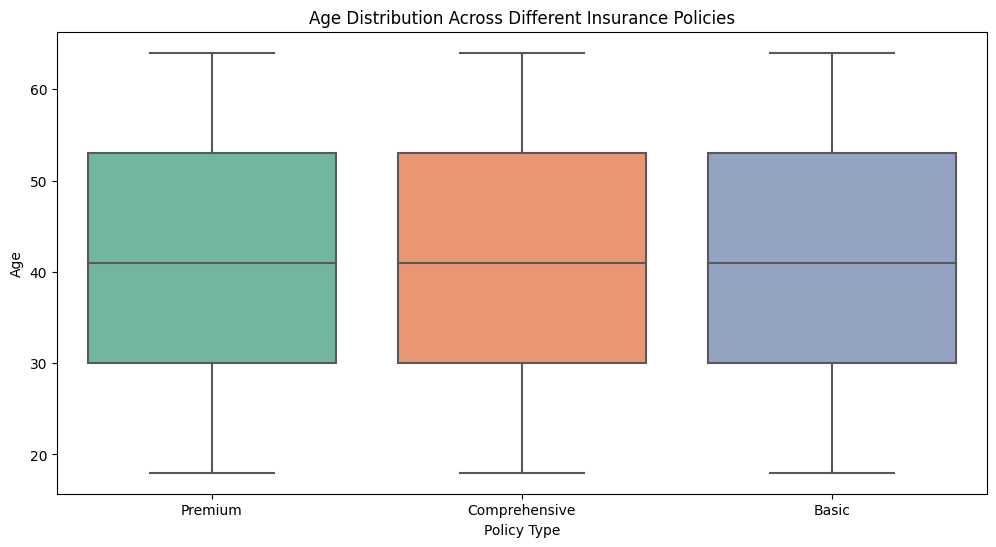

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = train_df, x ="Policy Type", y ="Age",  palette='Set2')
plt.title('Age Distribution Across Different Insurance Policies')
plt.xlabel('Policy Type')
plt.ylabel('Age')
plt.show()

In [12]:
# Group by Policy Type and calculate statistics
age_by_policy = train_df.groupby('Policy Type')['Age'].describe()
print("Age distribution across different insurance policies:")
print(age_by_policy)

Age distribution across different insurance policies:
                  count       mean        std   min   25%   50%   75%   max
Policy Type                                                                
Basic          398554.0  41.140039  13.427359  18.0  30.0  41.0  53.0  64.0
Comprehensive  399600.0  41.163191  13.441534  18.0  30.0  41.0  53.0  64.0
Premium        401846.0  41.126738  13.433160  18.0  30.0  41.0  53.0  64.0


In [13]:
# Count the number of customers for each gender
gender_counts = train_df["Gender"].value_counts()

# Calculate the percentage for each gender
gender_percentages = train_df['Gender'].value_counts(normalize=True) * 100

# Print the results
print("Gender Distribution:")
print(gender_counts)
print("\nGender Percentage Distribution:")
print(gender_percentages)

Gender Distribution:
Gender
Male      602571
Female    597429
Name: count, dtype: int64

Gender Percentage Distribution:
Gender
Male      50.21425
Female    49.78575
Name: proportion, dtype: float64


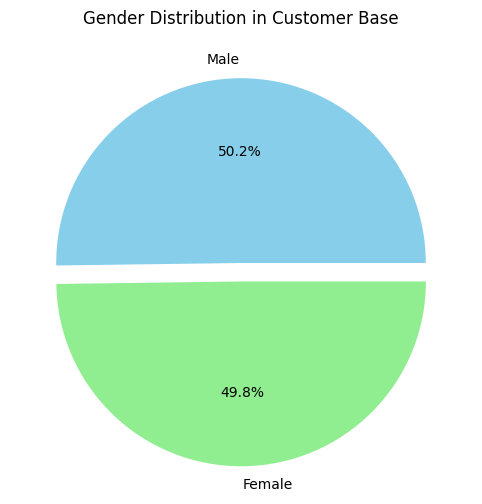

In [14]:
# Plot the gender distribution
plt.figure(figsize=(8, 6))
explode = [0,0.1]
gender_counts.plot(kind='pie', autopct='%1.1f%%',explode = explode, colors=['skyblue', 'lightgreen'], labels=gender_counts.index)
plt.title('Gender Distribution in Customer Base')
plt.ylabel('')  # Remove y-axis label
plt.show()

# Analyze Number of Dependents by Marital Status


In [15]:
# Group by Marital Status and calculate the average number of dependents
dependents_by_marital_status = train_df.groupby('Marital Status')['Number of Dependents'].mean()

# Print the results
print("Average Number of Dependents by Marital Status:")
print(dependents_by_marital_status)


Average Number of Dependents by Marital Status:
Marital Status
Divorced    2.008748
Married     2.011795
Single      2.006651
Name: Number of Dependents, dtype: float64


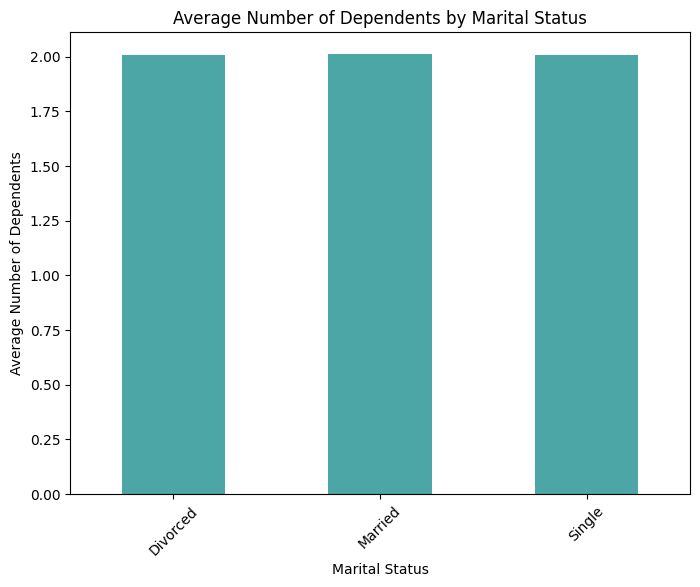

In [16]:
# Bar plot for dependents by marital status
plt.figure(figsize=(8, 6))
dependents_by_marital_status.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average Number of Dependents by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Dependents')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Calculate the correlation between Annual Income and Premium Amount
correlation = train_df['Annual Income'].corr(train_df['Premium Amount'])

print(f"Correlation between Annual Income and Premium Amount: {correlation:.2f}")

Correlation between Annual Income and Premium Amount: -0.01


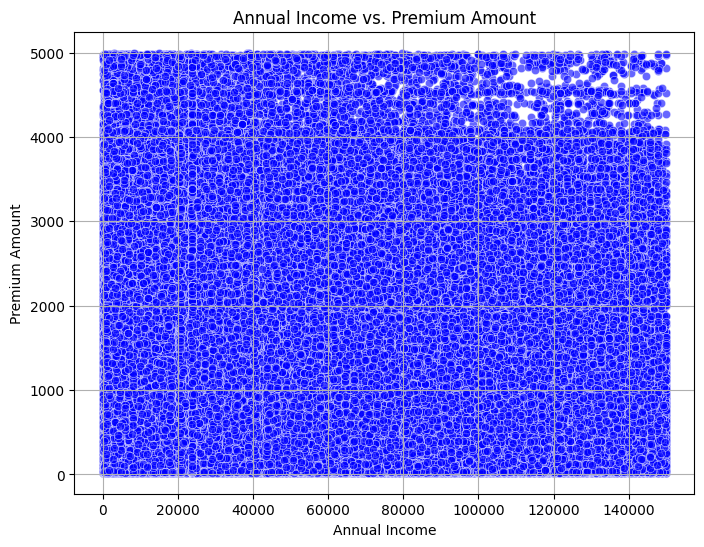

In [18]:


# Scatter plot for Annual Income vs. Premium Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='Annual Income', y='Premium Amount', alpha=0.6, color='blue')
plt.title('Annual Income vs. Premium Amount')
plt.xlabel('Annual Income')
plt.ylabel('Premium Amount')
plt.grid(True)
plt.show()

# Grouped Analysis of Credit Score and Policy Type

In [19]:
# Calculate average credit score for each policy type
credit_score_by_policy = train_df.groupby('Policy Type')['Credit Score'].mean()

# Print the results
print("Average Credit Score by Policy Type:")
print(credit_score_by_policy)


Average Credit Score by Policy Type:
Policy Type
Basic            593.256133
Comprehensive    593.342062
Premium          592.892108
Name: Credit Score, dtype: float64


# Distribution of Credit Scores Across Policy Types¶

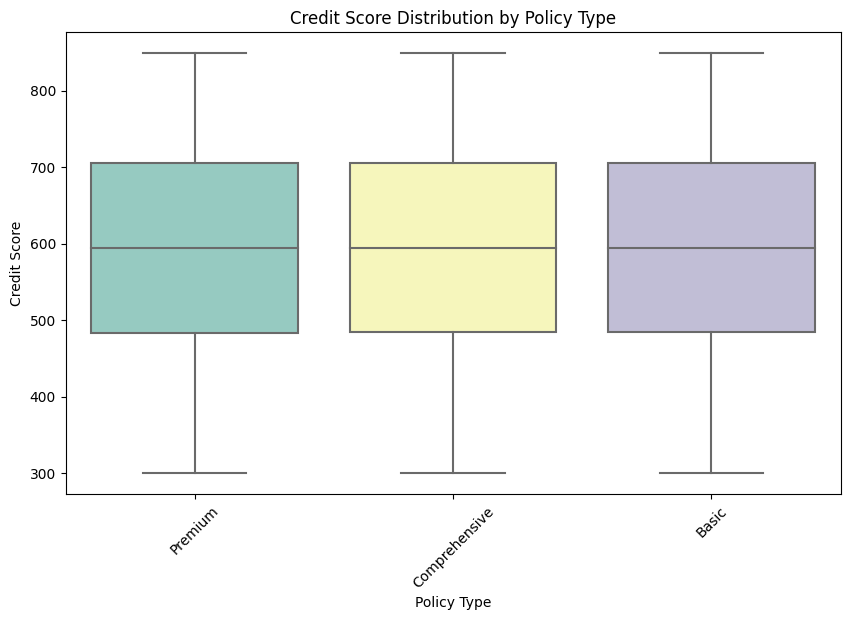

In [20]:

# Boxplot of Credit Score by Policy Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Policy Type', y='Credit Score', palette='Set3')
plt.title('Credit Score Distribution by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()


In [21]:
from scipy.stats import f_oneway

# Perform ANOVA for Credit Score across Policy Types
groups = [group['Credit Score'].dropna() for name, group in train_df.groupby('Policy Type')]
anova_result = f_oneway(*groups)

print(f"ANOVA Test Results: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

ANOVA Test Results: F-statistic = 1.15, p-value = 0.3169


# Relationship Between Smoking Status and Health Scores/Premium Amounts¶

In [22]:
# Group by Smoking Status and calculate average health score and premium amount
smoking_analysis = train_df.groupby('Smoking Status')[['Health Score', 'Premium Amount']].mean()

print("Average Health Score and Premium Amount by Smoking Status:")
print(smoking_analysis)

Average Health Score and Premium Amount by Smoking Status:
                Health Score  Premium Amount
Smoking Status                              
No                 25.574314     1102.403607
Yes                25.525840     1102.685158


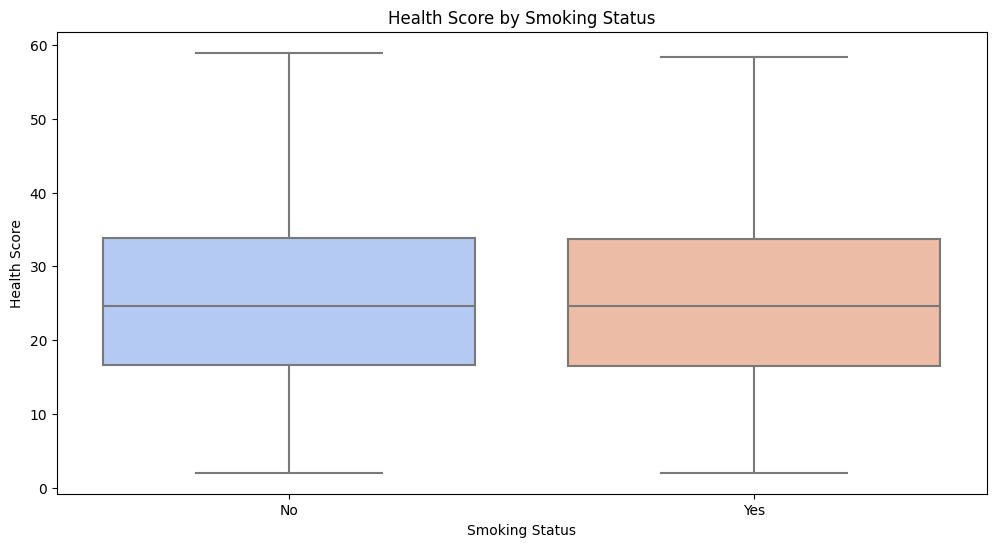

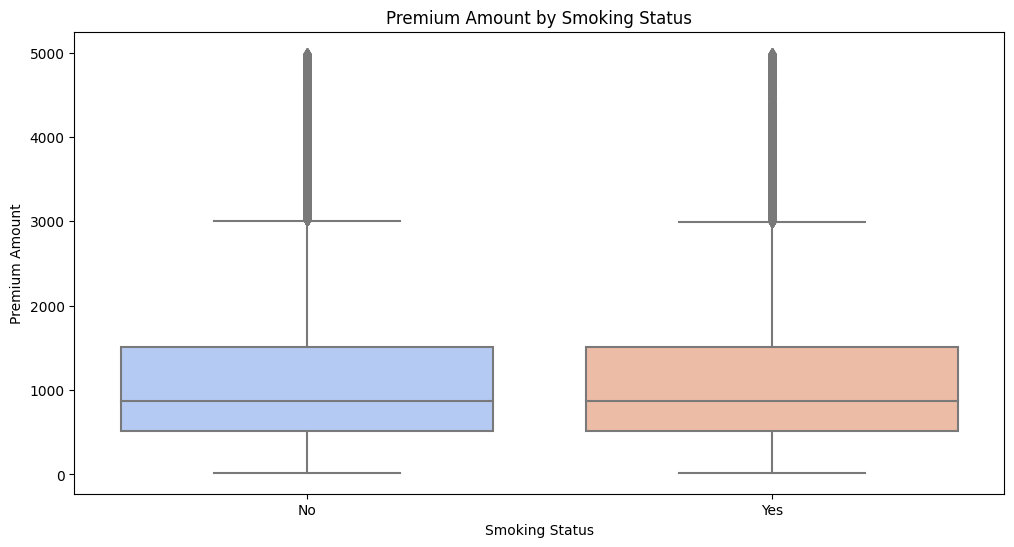

In [23]:
# Boxplot for Health Score by Smoking Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Smoking Status', y='Health Score', palette='coolwarm')
plt.title('Health Score by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Health Score')
plt.show()

# Boxplot for Premium Amount by Smoking Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Smoking Status', y='Premium Amount', palette='coolwarm')
plt.title('Premium Amount by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Premium Amount')
plt.show()


In [24]:
# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Add Age Group column
train_df['Age Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)


# Analyze Health Scores by Age Group

In [25]:
# Group by Age Group and calculate average health score
health_by_age_group = train_df.groupby('Age Group')['Health Score'].mean()

print("Average Health Score by Age Group:")
print(health_by_age_group)


Average Health Score by Age Group:
Age Group
<20      25.459249
20-30    25.533193
30-40    25.616774
40-50    25.505769
50-60    25.570790
60-70    25.536635
70+            NaN
Name: Health Score, dtype: float64


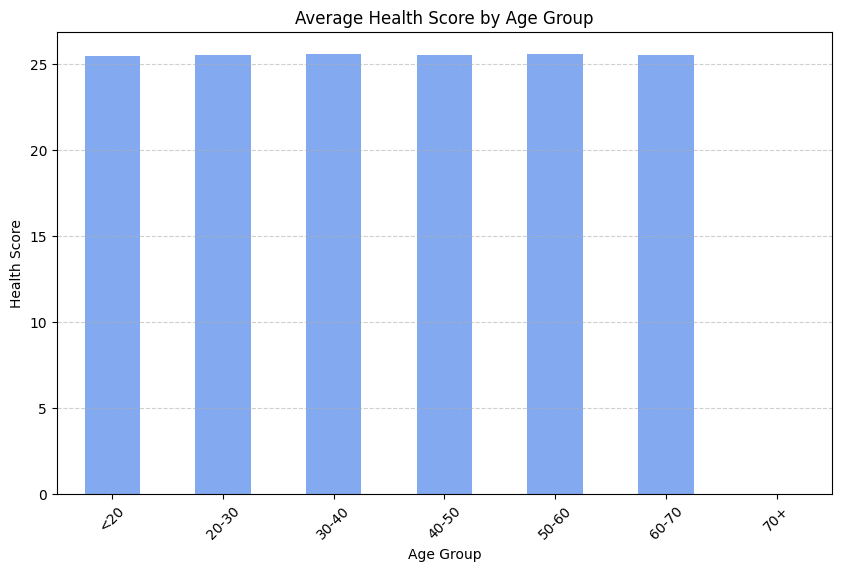

In [26]:
# Bar plot for Health Score by Age Group
plt.figure(figsize=(10, 6))
health_by_age_group.plot(kind='bar', color='cornflowerblue', alpha=0.8)
plt.title('Average Health Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Health Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Analyze Health Scores by Occupation


In [27]:
# Group by Occupation and calculate average health score
health_by_occupation = train_df.groupby('Occupation')['Health Score'].mean()

print("Average Health Score by Occupation:")
print(health_by_occupation)

Average Health Score by Occupation:
Occupation
Employed         25.533580
Self-Employed    25.525851
Unemployed       25.612739
Name: Health Score, dtype: float64


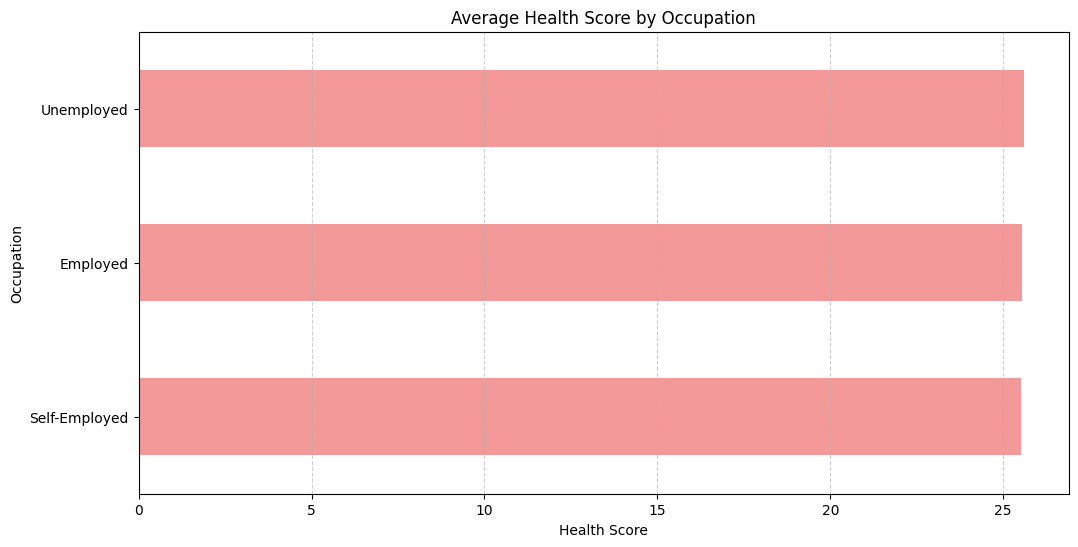

In [28]:
# Bar plot for Health Score by Occupation
plt.figure(figsize=(12, 6))
health_by_occupation.sort_values().plot(kind='barh', color='lightcoral', alpha=0.8)
plt.title('Average Health Score by Occupation')
plt.xlabel('Health Score')
plt.ylabel('Occupation')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [29]:
from scipy.stats import f_oneway

# Perform ANOVA for Health Score by Occupation
groups = [group['Health Score'].dropna() for name, group in train_df.groupby('Occupation')]
anova_result = f_oneway(*groups)

print(f"ANOVA Test Results (Occupation): F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

ANOVA Test Results (Occupation): F-statistic = 5.10, p-value = 0.0061


# Relationship Between Vehicle Age and Premium Amounts¶

In [30]:
# Group by Vehicle Age and calculate average premium amount
premium_by_vehicle_age = train_df.groupby('Vehicle Age')['Premium Amount'].mean()

print("Average Premium Amount by Vehicle Age:")
print(premium_by_vehicle_age)

Average Premium Amount by Vehicle Age:
Vehicle Age
0.0     1099.711888
1.0     1102.784102
2.0     1107.373964
3.0     1102.005063
4.0     1106.514463
5.0     1100.402898
6.0     1105.904673
7.0     1103.708911
8.0     1101.661309
9.0     1093.984574
10.0    1102.174454
11.0    1090.187141
12.0    1107.152047
13.0    1103.447294
14.0    1101.253391
15.0    1099.236562
16.0    1111.163478
17.0    1106.311041
18.0    1104.881757
19.0    1101.394628
Name: Premium Amount, dtype: float64


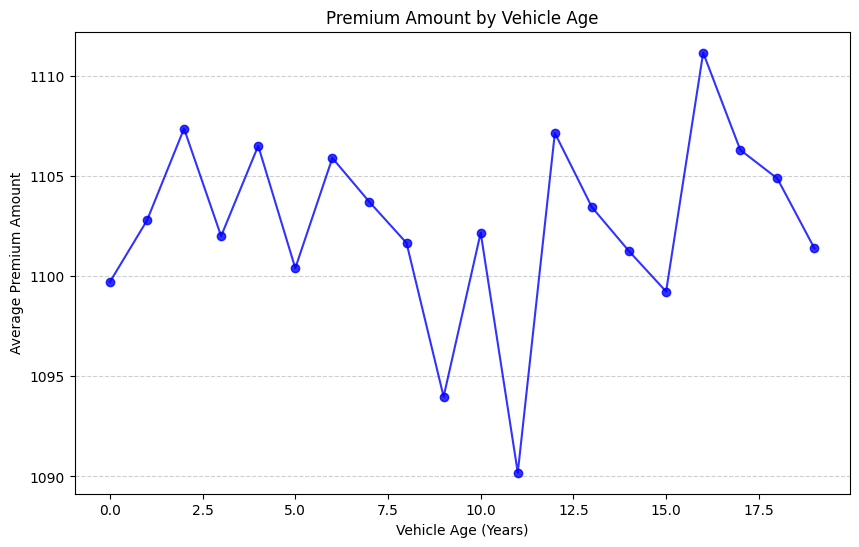

In [31]:
# Line plot for Premium Amount by Vehicle Age
plt.figure(figsize=(10, 6))
premium_by_vehicle_age.plot(kind='line', marker='o', color='blue', alpha=0.8)
plt.title('Premium Amount by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Average Premium Amount')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Relationship Between Vehicle Age and Policy Type

In [32]:
# Group by Vehicle Age and Policy Type to calculate counts
policy_by_vehicle_age = train_df.groupby(['Vehicle Age', 'Policy Type']).size().unstack()

print("Policy Type Distribution by Vehicle Age:")
print(policy_by_vehicle_age)

Policy Type Distribution by Vehicle Age:
Policy Type  Basic  Comprehensive  Premium
Vehicle Age                               
0.0          20406          20520    20689
1.0          19018          19049    19298
2.0          19892          19950    19899
3.0          19679          19699    19680
4.0          19279          19409    19460
5.0          19742          19830    19927
6.0          19427          19452    19205
7.0          19996          19716    19988
8.0          19593          19128    19577
9.0          19768          20123    19942
10.0         20405          20385    20567
11.0         20360          20546    20577
12.0         20065          20219    20434
13.0         19513          19567    19604
14.0         19940          20484    20391
15.0         20202          20274    20341
16.0         20107          19961    20246
17.0         20791          20774    21012
18.0         20416          20337    20646
19.0         19955          20177    20363


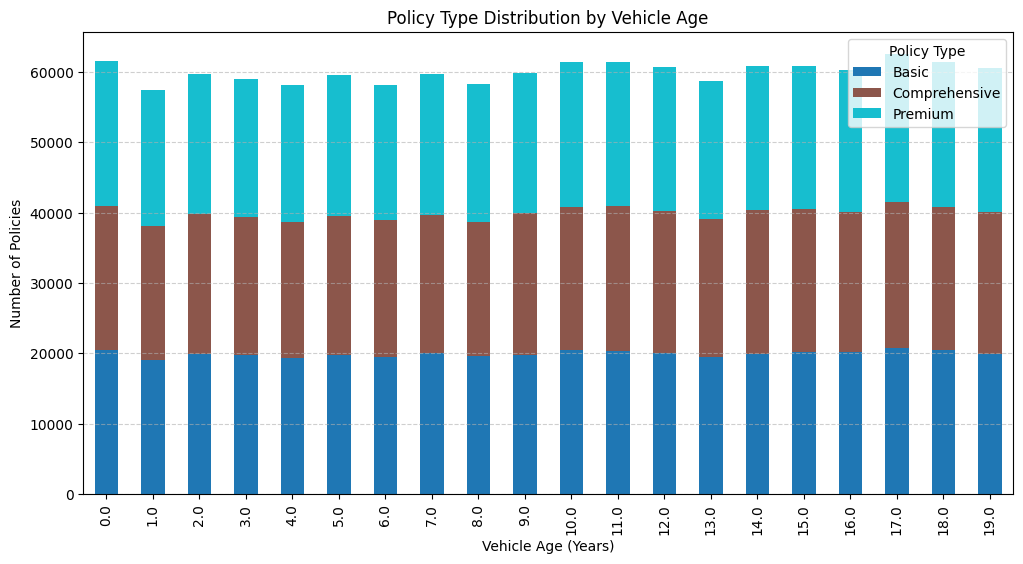

In [33]:
# Stacked bar plot for Policy Type by Vehicle Age
policy_by_vehicle_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Policy Type Distribution by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Analyze Customer Feedback by Policy Type

In [34]:
# Group by Policy Type and Feedback to count occurrences
feedback_by_policy = train_df.groupby(['Policy Type', 'Customer Feedback']).size().unstack(fill_value=0)

print("Customer Feedback Distribution by Policy Type:")
print(feedback_by_policy)

Customer Feedback Distribution by Policy Type:
Customer Feedback  Average    Good    Poor
Policy Type                               
Basic               151611  122574  124369
Comprehensive       151864  122542  125194
Premium             152254  123637  125955


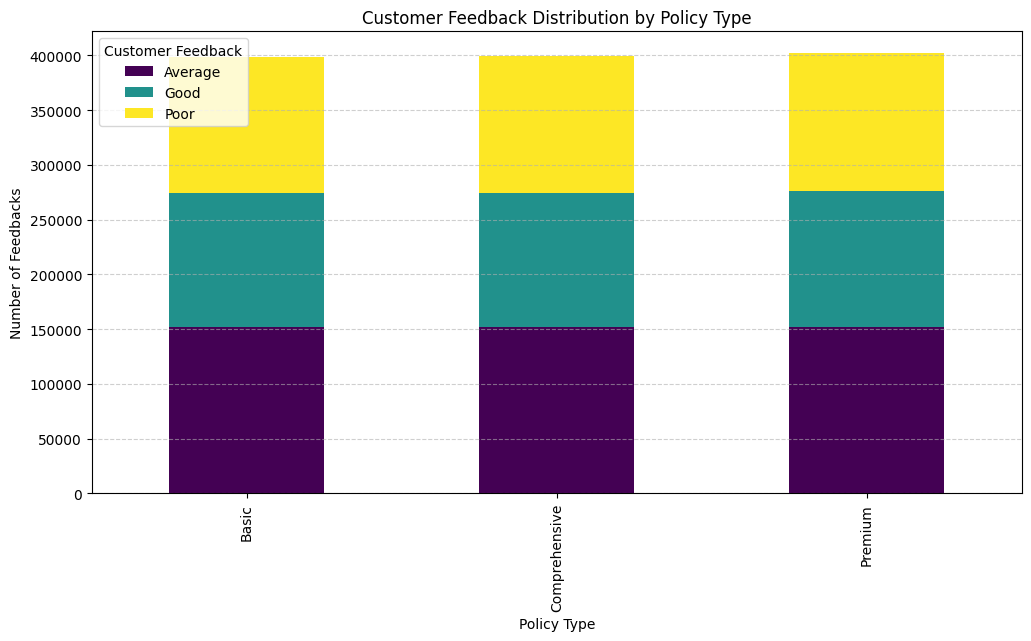

In [35]:
# Stacked bar plot for Feedback by Policy Type
feedback_by_policy.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Feedback Distribution by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Number of Feedbacks')
plt.legend(title='Customer Feedback', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [36]:
# Categorize Health Scores into bins
bins = [0, 40, 60, 80, 100]
labels = ['Poor', 'Average', 'Good', 'Excellent']
train_df['Health Score Category'] = pd.cut(train_df['Health Score'], bins=bins, labels=labels, right=False)

# Group by Health Score Category and Feedback
feedback_by_health = train_df.groupby(['Health Score Category', 'Customer Feedback']).size().unstack(fill_value=0)

print("Customer Feedback Distribution by Health Score Category:")
print(feedback_by_health)

Customer Feedback Distribution by Health Score Category:
Customer Feedback      Average    Good    Poor
Health Score Category                         
Poor                    392031  317727  323432
Average                  63698   51026   52086
Good                         0       0       0
Excellent                    0       0       0


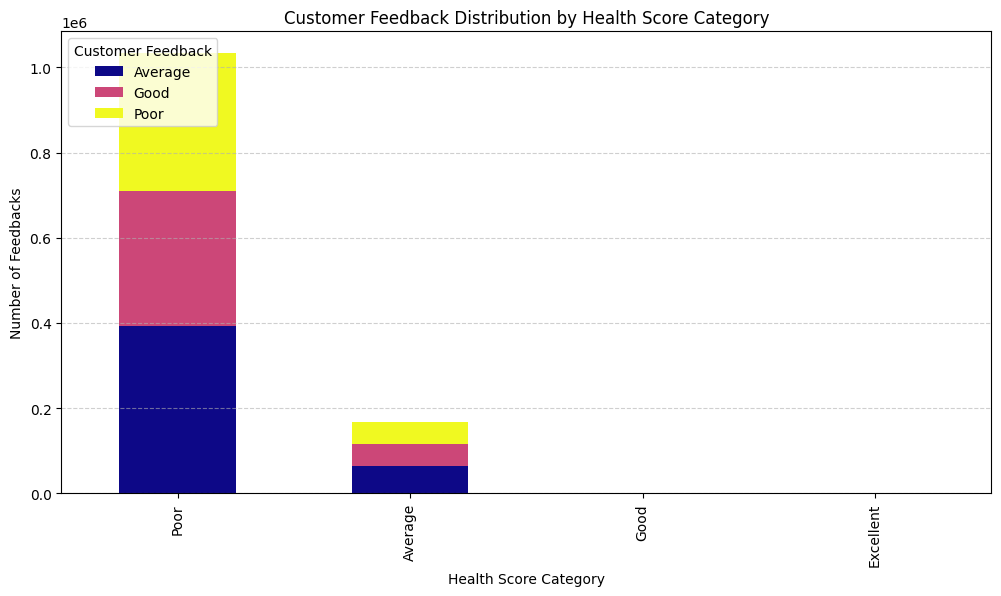

In [37]:
# Stacked bar plot for Feedback by Health Score Category
feedback_by_health.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Customer Feedback Distribution by Health Score Category')
plt.xlabel('Health Score Category')
plt.ylabel('Number of Feedbacks')
plt.legend(title='Customer Feedback', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Relationship Between Property Type and Premium Amount

In [38]:
# Group by Property Type and calculate average premium amount
premium_by_property_type = train_df.groupby('Property Type')['Premium Amount'].mean()

print("Average Premium Amount by Property Type:")
print(premium_by_property_type)

Average Premium Amount by Property Type:
Property Type
Apartment    1104.150596
Condo        1101.922627
House        1101.561680
Name: Premium Amount, dtype: float64


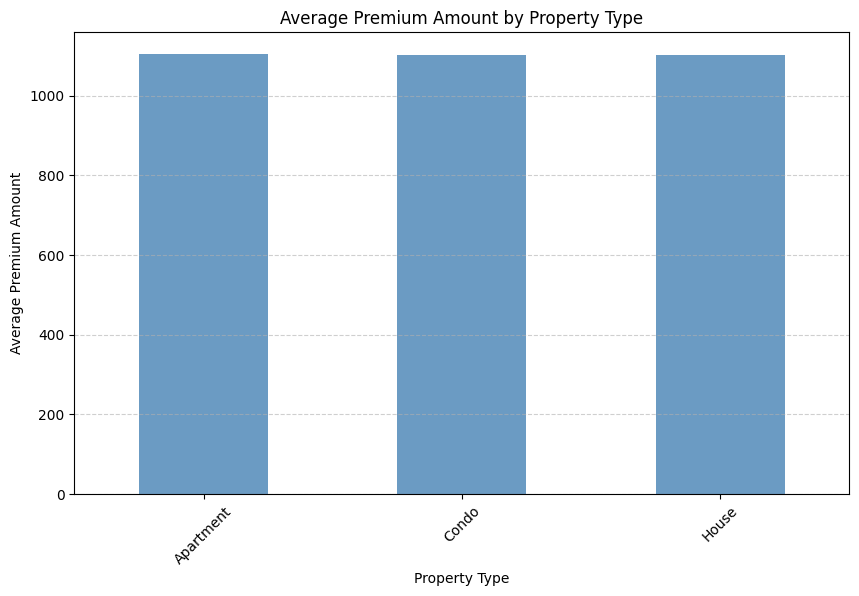

In [39]:
import matplotlib.pyplot as plt

# Bar plot for Premium Amount by Property Type
plt.figure(figsize=(10, 6))
premium_by_property_type.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Average Premium Amount by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Premium Amount')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

In [40]:
# Group by Property Type and Policy Type to count occurrences
policy_by_property_type = train_df.groupby(['Property Type', 'Policy Type']).size().unstack(fill_value=0)

print("Policy Preferences by Property Type:")
print(policy_by_property_type)


Policy Preferences by Property Type:
Policy Type     Basic  Comprehensive  Premium
Property Type                                
Apartment      132725         133288   133965
Condo          132593         132646   134434
House          133236         133666   133447


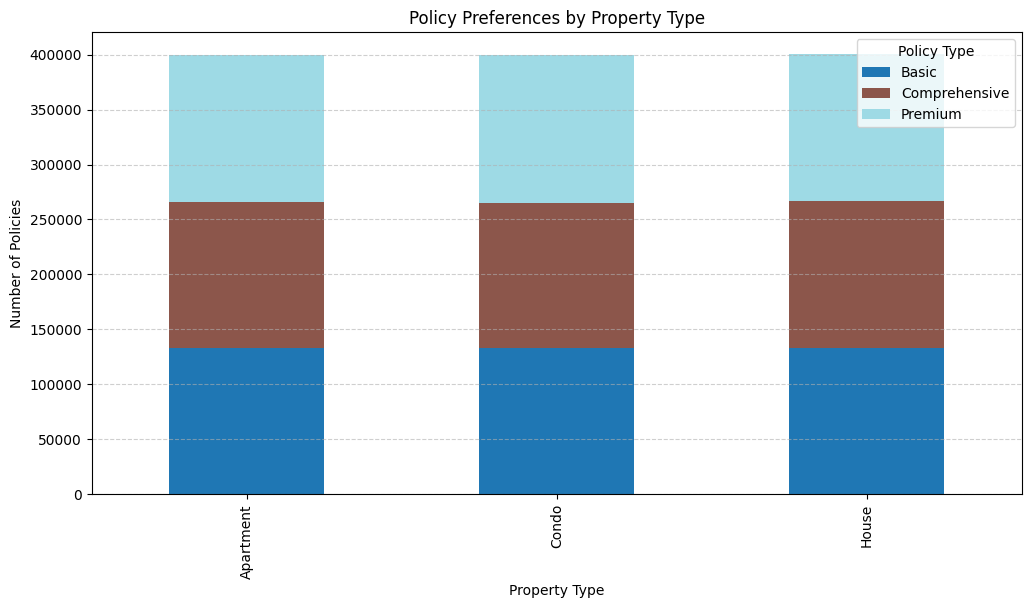

In [41]:
# Stacked bar plot for Policy Preferences by Property Type
policy_by_property_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Policy Preferences by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Extract Month and Year from Policy Start Dates

In [42]:
# Convert Policy Start Date to datetime format
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])

# Extract Month and Year
train_df['Policy Start Month'] = train_df['Policy Start Date'].dt.month
train_df['Policy Start Year'] = train_df['Policy Start Date'].dt.year

In [43]:
# Count the number of policies started in each month
policies_by_month = train_df['Policy Start Month'].value_counts().sort_index()

print("Number of Policies by Month:")
print(policies_by_month)

Number of Policies by Month:
Policy Start Month
1      98535
2      95924
3     102909
4     100906
5     105176
6      98500
7     100772
8     101077
9      99377
10     99408
11     99894
12     97522
Name: count, dtype: int64


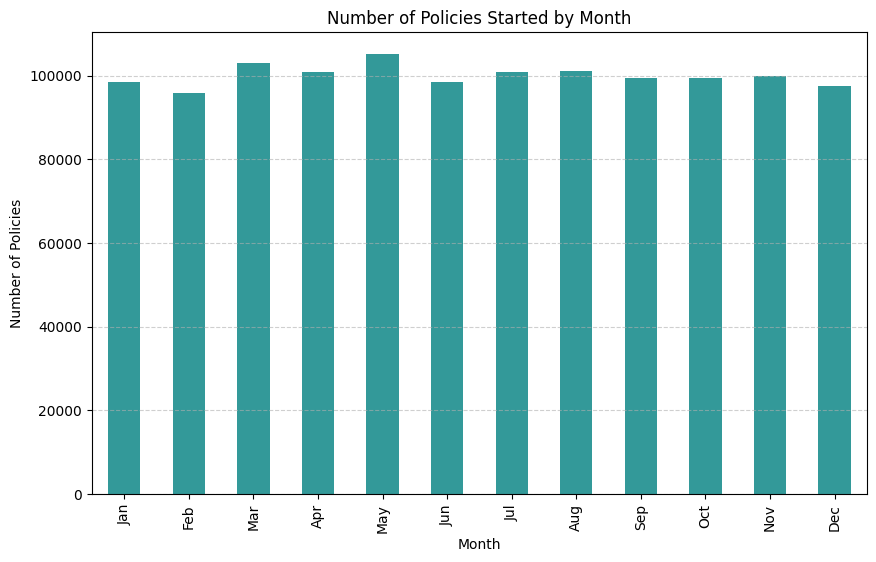

In [44]:
# Bar plot for Policies by Month
plt.figure(figsize=(10, 6))
policies_by_month.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Number of Policies Started by Month')
plt.xlabel('Month')
plt.ylabel('Number of Policies')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [45]:
# Count the number of policies started in each year
policies_by_year = train_df['Policy Start Year'].value_counts().sort_index()

print("Number of Policies by Year:")
print(policies_by_year)

Number of Policies by Year:
Policy Start Year
2019     84289
2020    242087
2021    244918
2022    245671
2023    239067
2024    143968
Name: count, dtype: int64


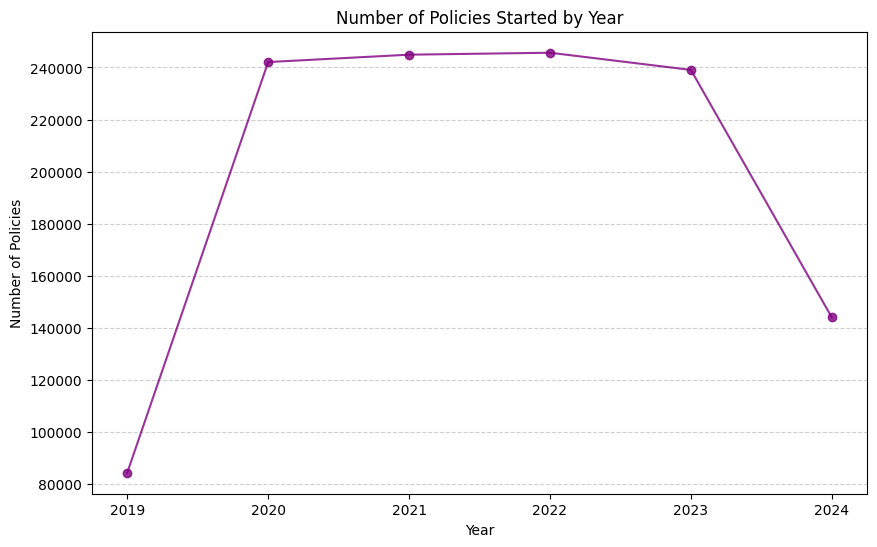

In [46]:
# Line plot for Policies by Year
plt.figure(figsize=(10, 6))
policies_by_year.plot(kind='line', marker='o', color='purple', alpha=0.8)
plt.title('Number of Policies Started by Year')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [47]:
# Group by Month and Policy Type
policy_type_by_month = train_df.groupby(['Policy Start Month', 'Policy Type']).size().unstack(fill_value=0)

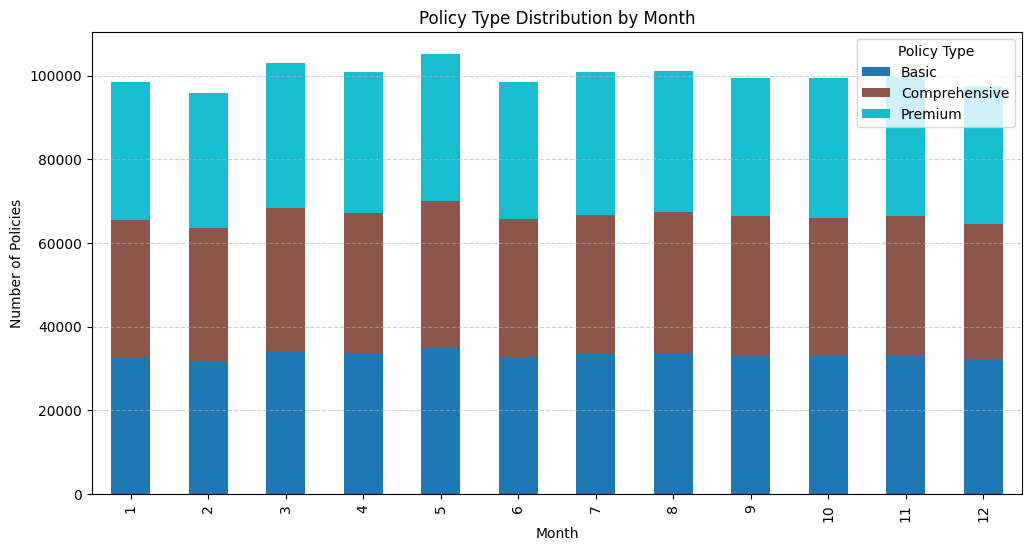

In [48]:
# Stacked bar plot for Policy Type by Month
policy_type_by_month.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Policy Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

> Insurance Duration by Demographics
By Age Group

In [49]:
# Define age bins and labels
bins = [0, 25, 40, 60, 80]
labels = ['18-25', '26-40', '41-60', '61-80']
train_df['Age Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Calculate average insurance duration by age group
duration_by_age_group = train_df.groupby('Age Group')['Insurance Duration'].mean()

print("Average Insurance Duration by Age Group:")
print(duration_by_age_group)


Average Insurance Duration by Age Group:
Age Group
18-25    5.017344
26-40    5.021764
41-60    5.012104
61-80    5.034144
Name: Insurance Duration, dtype: float64


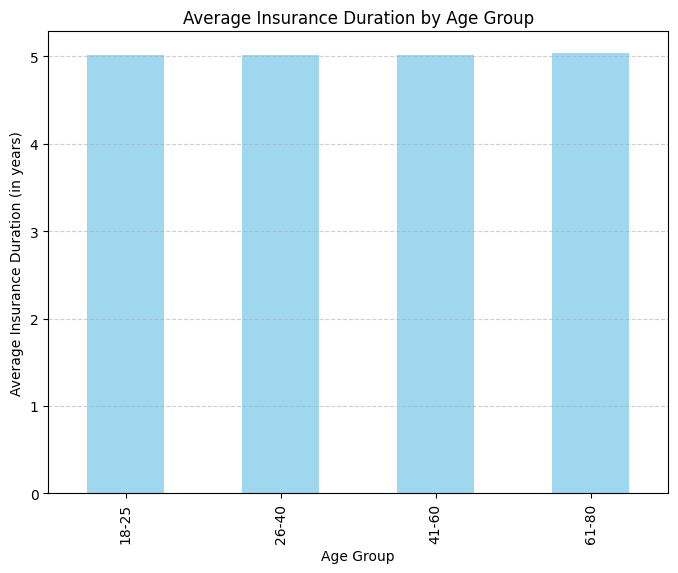

In [50]:
# Bar plot for Insurance Duration by Age Group
duration_by_age_group.plot(kind='bar', color='skyblue', alpha=0.8, figsize=(8, 6))
plt.title('Average Insurance Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Insurance Duration (in years)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

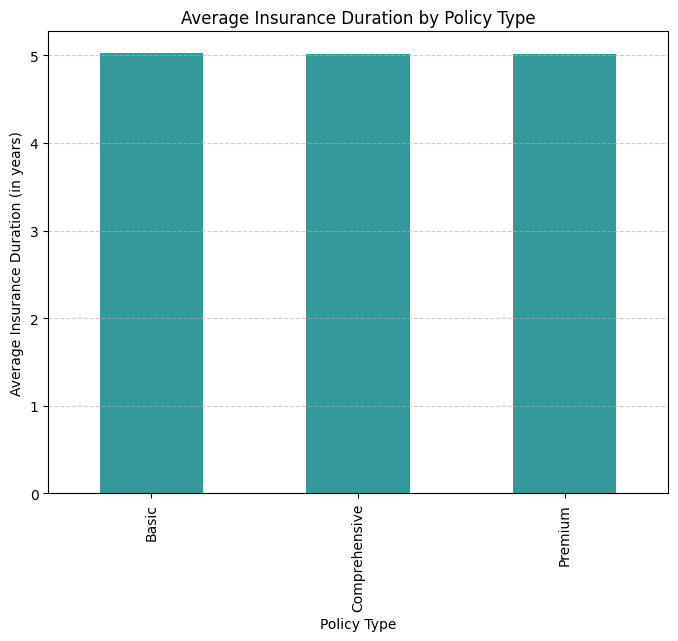

In [51]:
# Calculate average insurance duration by policy type
duration_by_policy = train_df.groupby('Policy Type')['Insurance Duration'].mean()
# Bar plot
duration_by_policy.plot(kind='bar', color='teal', alpha=0.8, figsize=(8, 6))
plt.title('Average Insurance Duration by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Insurance Duration (in years)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Insurance Duration Across Combined Demographics
> By Marital Status and Number of Dependents

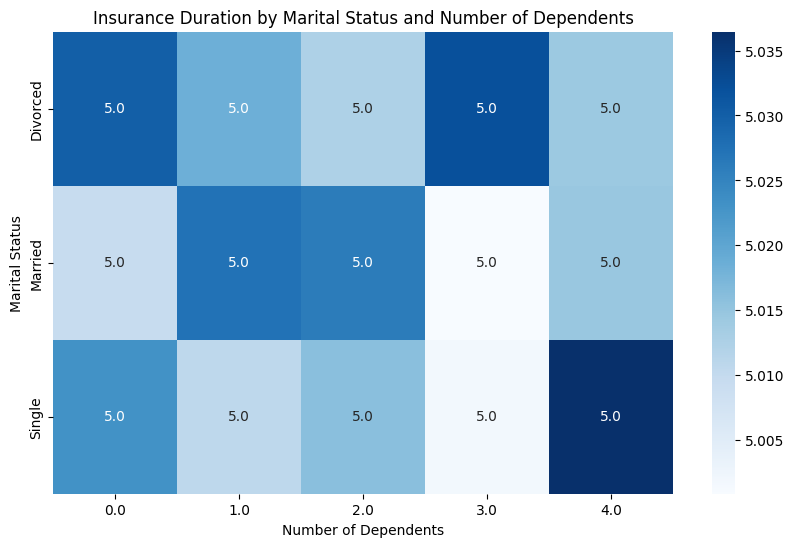

In [52]:
# Average Insurance Duration by Marital Status and Number of Dependents
duration_by_marital_dependents = train_df.groupby(['Marital Status', 'Number of Dependents'])['Insurance Duration'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(duration_by_marital_dependents, annot=True, fmt=".1f", cmap='Blues', cbar=True)
plt.title('Insurance Duration by Marital Status and Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Marital Status')
plt.show()


# Correlation Between Insurance Duration and Demographics

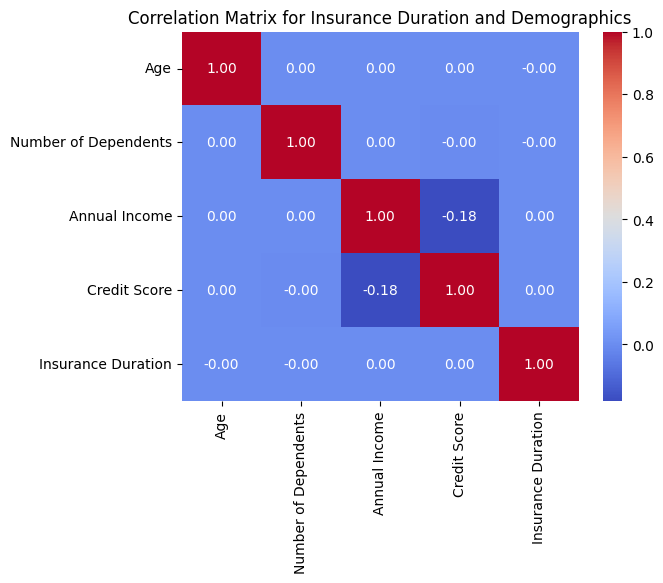

In [53]:
# Select relevant numeric columns
relevant_columns = ['Age', 'Number of Dependents', 'Annual Income', 'Credit Score', 'Insurance Duration']
correlation_matrix = train_df[relevant_columns].corr()

# Heatmap for visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Insurance Duration and Demographics')
plt.show()

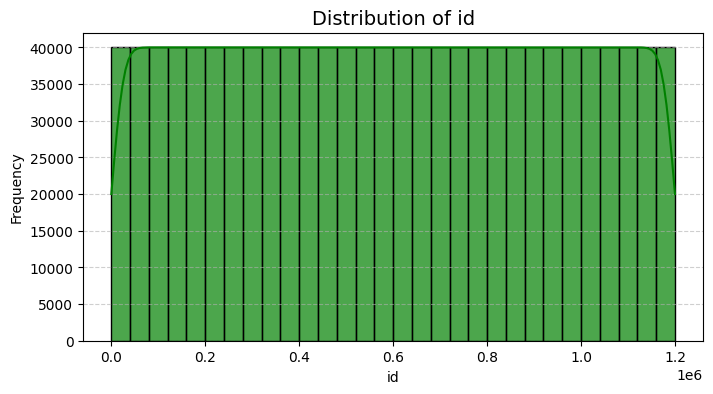

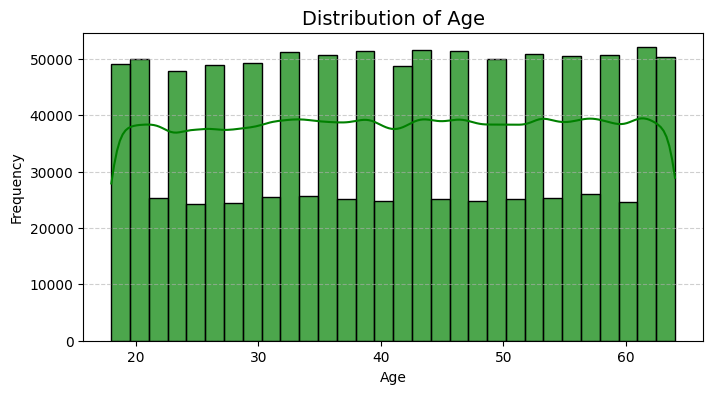

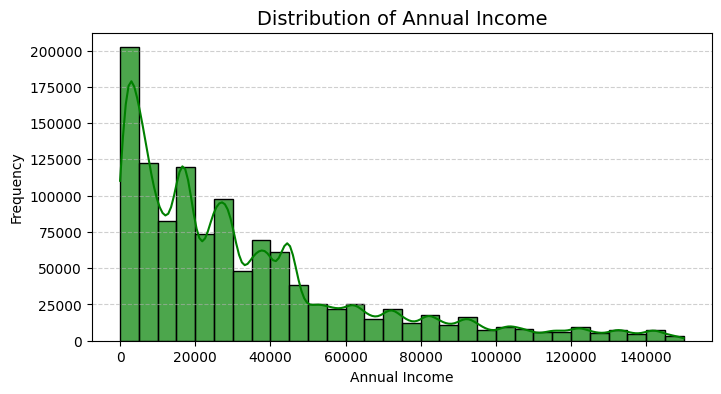

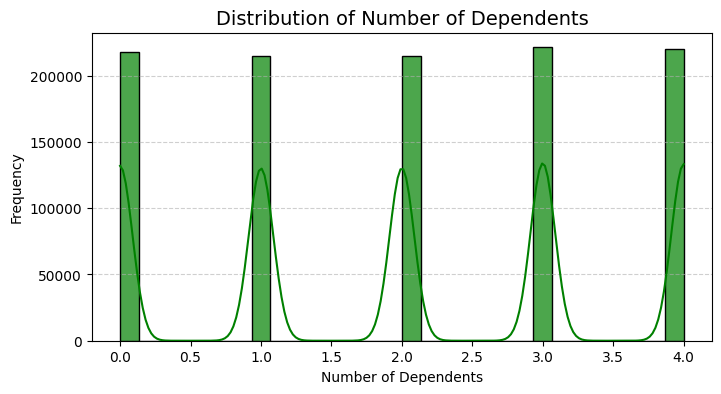

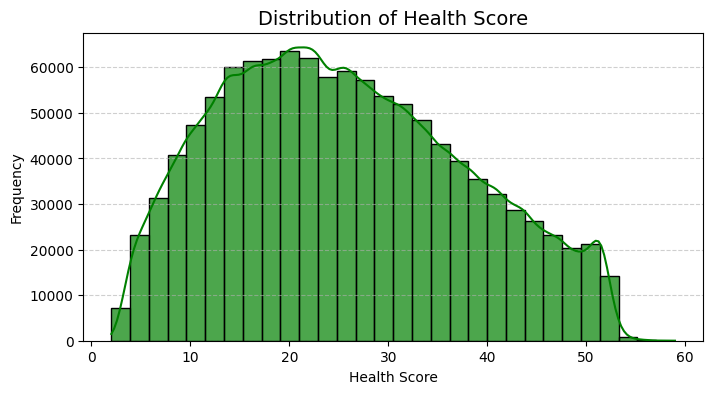

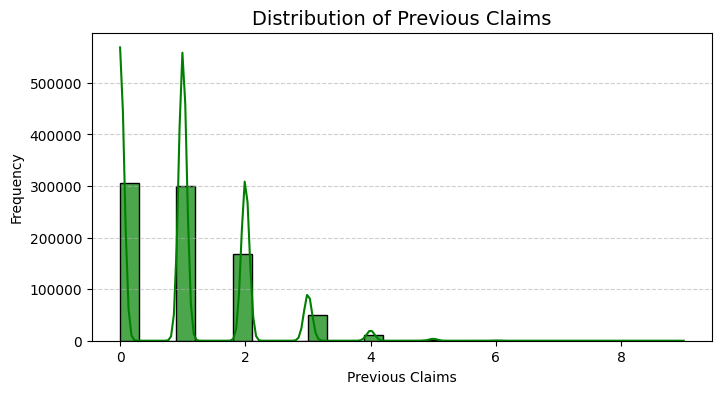

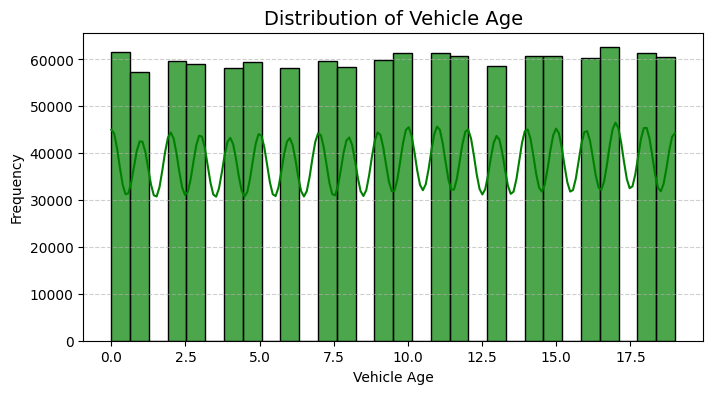

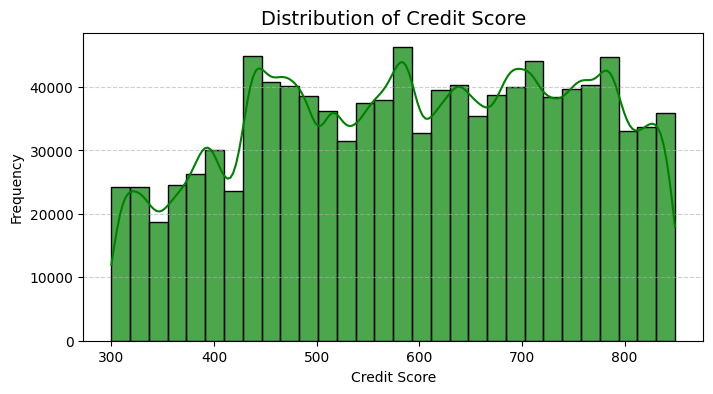

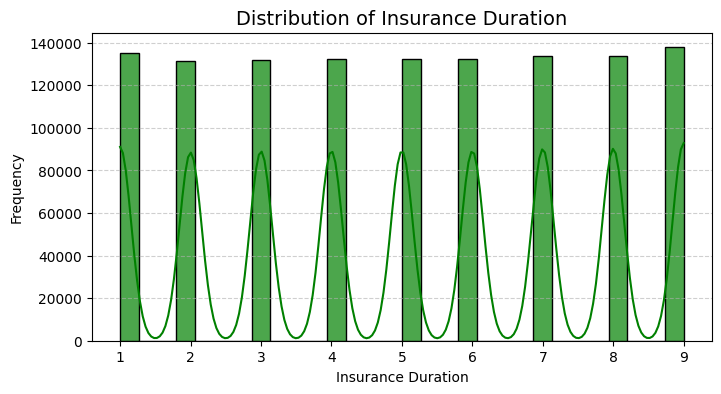

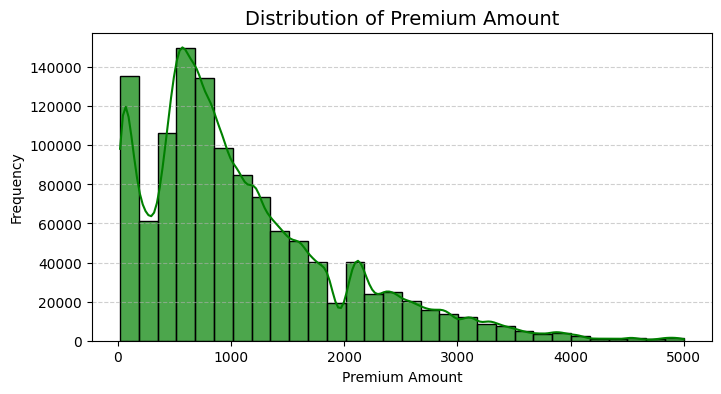

In [54]:

# Plot distributions for all numerical columns
for col in numerical_train.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=numerical_train, x=col, kde=True, color="green", bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

                 

In [55]:
# 1. Label Encoding for Binary Categories
binary_cols = ['Gender', 'Marital Status', 'Smoking Status']  # Add more binary columns if applicable
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

# 2. One-Hot Encoding for Multi-Class Categorical Features
multi_class_cols = [
    'Education Level', 'Occupation', 'Location', 'Policy Type', 
    'Customer Feedback', 'Exercise Frequency', 'Property Type'
]
train_df = pd.get_dummies(train_df, columns=multi_class_cols, drop_first=True)

# 3. Category-to-Integer Mapping for 'Age Group' and 'Health Score Category'
category_mapping = {
    'Age Group': {label: idx for idx, label in enumerate(train_df['Age Group'].cat.categories)},
    'Health Score Category': {label: idx for idx, label in enumerate(train_df['Health Score Category'].cat.categories)}
}

train_df['Age Group'] = train_df['Age Group'].map(category_mapping['Age Group'])
train_df['Health Score Category'] = train_df['Health Score Category'].map(category_mapping['Health Score Category'])

# 4. Processing 'Policy Start Date' - Extract Year and Month (Already done)
# Policy Start Month and Policy Start Year are present, so this step is skipped.

# Keep 'id' column
# Exclude 'id' during model training
features = train_df.drop(['id'], axis=1)  # Exclude 'id' for training
labels = train_df['id']  # Keep it separate if needed

# Check the final DataFrame
print(features.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Age                          1200000 non-null  float64       
 1   Gender                       1200000 non-null  int64         
 2   Annual Income                1200000 non-null  float64       
 3   Marital Status               1200000 non-null  int64         
 4   Number of Dependents         1200000 non-null  float64       
 5   Health Score                 1200000 non-null  float64       
 6   Previous Claims              1200000 non-null  float64       
 7   Vehicle Age                  1200000 non-null  float64       
 8   Credit Score                 1200000 non-null  float64       
 9   Insurance Duration           1200000 non-null  float64       
 10  Policy Start Date            1200000 non-null  datetime64[ns]
 11  Smoking Sta

# Contuing